# Normalization and Whitening

Most machine learning algorithms only perform well on data that has been properly prepaired. In practice it is almost always preferable to scale our input data and shift the mean to zero before passing it to our model. We then both train and deploy our model using scaled input. So long as you apply the same normalization techniques to your test and production data that you did to the training data, the performance of your algorithm should greatly improve.


In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import norm

from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

data = []
# load the csv
with open('../../data/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        # some of the data has bad lines, ignore
        if len(row) == 6 or len(row) == 7:
            try:
                z = float(row[5].replace(';', ''))
            except:
                continue
            # create a design matrix with:
            # user, activity (string), timestamp, x, y, and z accelerometer data
            data.append((int(row[0]), row[1], int(row[2]), float(row[3]), float(row[4]), z))

## Un-normalized (Raw Data)

Below is a histogram showing the data distribution from raw data. We can see that accelerometer data from the x and z axies are fairly normaly distributed. However, the mean of the y axis accelerometer appears to be shifted significantly to the right.

x mean: 0.66    x std dev:6.85
y mean: 7.26    y std dev:6.75
z mean: 0.41    z std dev:4.75


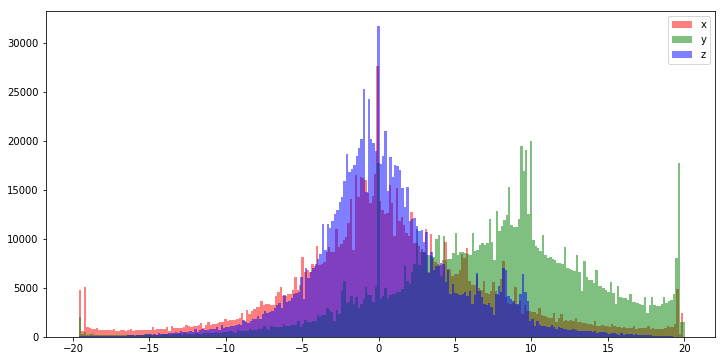

In [2]:
x = [d[3] for d in data]
y = [d[4] for d in data]
z = [d[5] for d in data]

print('x mean: {:.2f}    x std dev:{:.2f}'.format(np.mean(x), np.std(x)))
print('y mean: {:.2f}    y std dev:{:.2f}'.format(np.mean(y), np.std(y)))
print('z mean: {:.2f}    z std dev:{:.2f}'.format(np.mean(z), np.std(z)))

plt.hist(x, bins=250, alpha=0.5, label='x', color='r')
plt.hist(y, bins=250, alpha=0.5, label='y', color='g')
plt.hist(z, bins=250, alpha=0.5, label='z', color='b')
plt.legend(loc='upper right')
plt.show()

## Feature-Wise Min-Max Scaler

One method of normalization is a simple min-max scaler which scales the values from one range to another. By default, it finds the smallest and largest values in the dataset and applies a transformation to all values such that those min and max values are now `0.0` and `1.0`. We've instead chosen to re-map the values between `-1.0` and `1.0`. Notice how the values on the x-axis below have changed but the overal distribution appears identical to the raw data. 

/home/bbpwn2/Documents/Branger_Briz/machine-learning-docs/code/venv/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/bbpwn2/Documents/Branger_Briz/machine-learning-docs/code/venv/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/bbpwn2/Documents/Branger_Briz/machine-learning-docs/code/venv/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: Dep

x mean: 0.02    x std dev:0.35
y mean: 0.36    y std dev:0.34
z mean: 0.03    z std dev:0.24


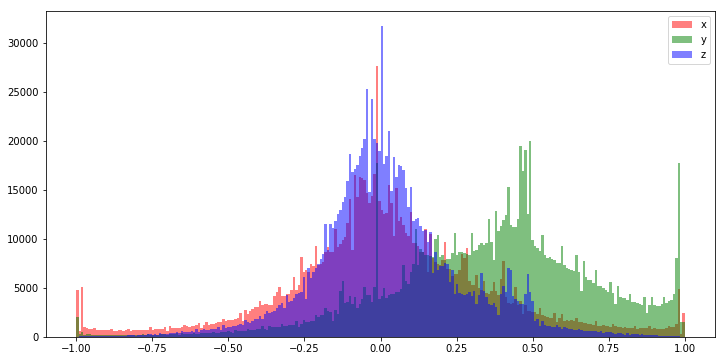

In [3]:
# in sklearn, MinMaxScaler is a class with fit_transform as a method that applies
# the actual transformation. This is because it is a common practice to use your
# training data to learn what that range mapping is, and then use that same range
# mapping come test/production time on new data, that may have larger maxes or lower min values
# but can be assumed to have a similar distribution to the training data.

x2 = preprocessing.MinMaxScaler(feature_range=(-1.0, 1.0)).fit_transform(x)
y2 = preprocessing.MinMaxScaler(feature_range=(-1.0, 1.0)).fit_transform(y)
z2 = preprocessing.MinMaxScaler(feature_range=(-1.0, 1.0)).fit_transform(z)

print('x mean: {:.2f}    x std dev:{:.2f}'.format(np.mean(x2), np.std(x2)))
print('y mean: {:.2f}    y std dev:{:.2f}'.format(np.mean(y2), np.std(y2)))
print('z mean: {:.2f}    z std dev:{:.2f}'.format(np.mean(z2), np.std(z2)))

plt.hist(x2, bins=250, alpha=0.5, label="x", color='r')
plt.hist(y2, bins=250, alpha=0.5, label="y", color='g')
plt.hist(z2, bins=250, alpha=0.5, label="z", color='b')
plt.legend(loc='upper right')
plt.show()

## Zero-Mean and Unit Variance

x mean: 0.00    x std dev:1.00
y mean: -0.00    y std dev:1.00
z mean: 0.00    z std dev:1.00


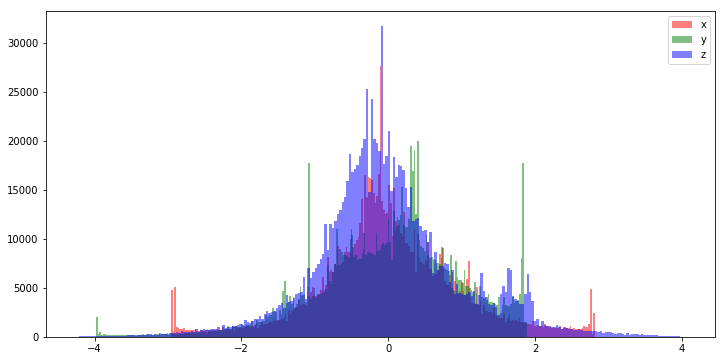

In [4]:
x3 = preprocessing.scale(x)
y3 = preprocessing.scale(y)
z3 = preprocessing.scale(z)

print('x mean: {:.2f}    x std dev:{:.2f}'.format(np.mean(x3), np.std(x3)))
print('y mean: {:.2f}    y std dev:{:.2f}'.format(np.mean(y3), np.std(y3)))
print('z mean: {:.2f}    z std dev:{:.2f}'.format(np.mean(z3), np.std(z3)))

plt.hist(x3, bins=250, alpha=0.5, label='x', color='r')
plt.hist(y3, bins=250, alpha=0.5, label='y', color='g')
plt.hist(z3, bins=250, alpha=0.5, label='z', color='b')
plt.legend(loc='upper right')
plt.show()

## Zero-Mean and Unit Variance + Min/Max Scaler

x mean: -0.02    x std dev:0.35
y mean: -0.36    y std dev:0.34
z mean: -0.03    z std dev:0.24


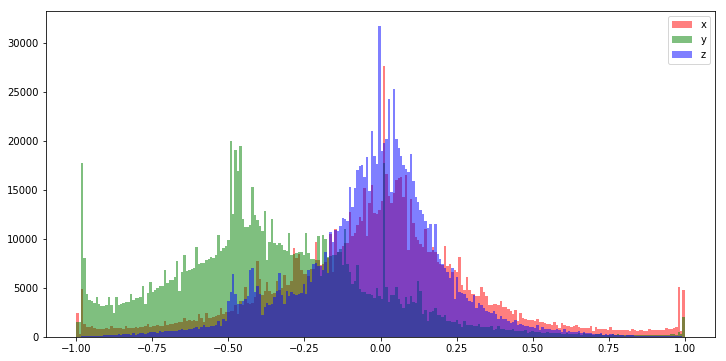

In [5]:
def normalize(a):
    return 2 * (a - np.max(a))/-np.ptp(a) - 1

x4 = normalize(preprocessing.scale(x))
y4 = normalize(preprocessing.scale(y))
z4 = normalize(preprocessing.scale(z))

print('x mean: {:.2f}    x std dev:{:.2f}'.format(np.mean(x4), np.std(x4)))
print('y mean: {:.2f}    y std dev:{:.2f}'.format(np.mean(y4), np.std(y4)))
print('z mean: {:.2f}    z std dev:{:.2f}'.format(np.mean(z4), np.std(z4)))

plt.hist(x4, bins=250, alpha=0.5, label='x', color='r')
plt.hist(y4, bins=250, alpha=0.5, label='y', color='g')
plt.hist(z4, bins=250, alpha=0.5, label='z', color='b')
plt.legend(loc='upper right')
plt.show()

## Prepaire Data

In [6]:
from keras.utils.np_utils import to_categorical

def activity_as_int(activity):
    if activity == 'Walking':
        return 0
    elif activity == 'Jogging':
        return 1
    elif activity == 'Sitting':
        return 2
    elif activity == 'Standing':
        return 3
    elif activity == 'Upstairs':
        return 4
    elif activity == 'Downstairs':
        return 5
    else: 
        # error
        return -1

def get_sliding_windows(X, y, window_size):
    X_, y_ = [], []
    for i in range(len(X) - window_size):
        X_.append(X[i:i + window_size])
        y_.append(y[i + window_size])
    return np.array(X_), y_
    
split = 0.85
window_size = 60 # 20hz sample rate, so we use a window size of 3 seconds
targets = to_categorical([activity_as_int(d[1]) for d in data], 6)
inputs, targets = get_sliding_windows(zip(x2, y2, z2), targets, window_size)

X_train = inputs[0:int(len(inputs) * split)]
X_test  = inputs[int(len(inputs) * split):]

y_train = targets[0:int(len(targets) * split)]
y_test  = targets[int(len(targets) * split):]

print(X_train.shape)
# y_train = y_train[0:len(X_train)]
# y_test = y_test[0:len(X_test)]

assert len(X_test) == len(y_test)
assert len(X_train) == len(y_train)

Using TensorFlow backend.


(933417, 60, 3)


# Training

In [9]:
import os, sys
sys.path.append('/home/brannon/Documents/code')

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.callbacks import LambdaCallback
from keras_weight_animator import image_saver_callback

def get_model(window_size):
    
    model = Sequential()
    model.add(LSTM(64, 
                   batch_input_shape=(32, window_size, 3), 
                   return_sequences=False, stateful=False))
    model.add(Activation('relu'))
    model.add(Dense(6))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    return model

X_train = np.array(X_train[0: len(X_train) - (len(X_train) % 32)])
y_train = np.array(y_train[0: len(y_train) - (len(y_train) % 32)])

model = get_model(window_size)
callbacks = [image_saver_callback(model, './data/weight_animator/01', cmap='bwr')]
history = model.fit(X_train, y_train, epochs=1, shuffle=True, callbacks=callbacks)

Epoch 1/1
   160/933408 [..............................] - ETA: 110904s - loss: 1.7390 - acc: 0.3312

/home/bbpwn2/Documents/Branger_Briz/machine-learning-docs/code/venv/local/lib/python2.7/site-packages/keras/callbacks.py:97: UserWarning: Method on_batch_begin() is slow compared to the batch update (9.249536). Check your callbacks.
  % delta_t_median)


933408/933408 [==============================] - 1054s - loss: 0.2674 - acc: 0.9092       

In [14]:
# must be multiples of batch size
X_test = X_test[0:len(X_test) - (len(X_test) % 32)]
y_test = np.array(y_test[0:len(y_test) - (len(y_test) % 32)])

score = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(score[0], score[1]))

test loss: 1.34362480109, test accuracy: 0.734384107247


## Compare Real and Predicted Distributions

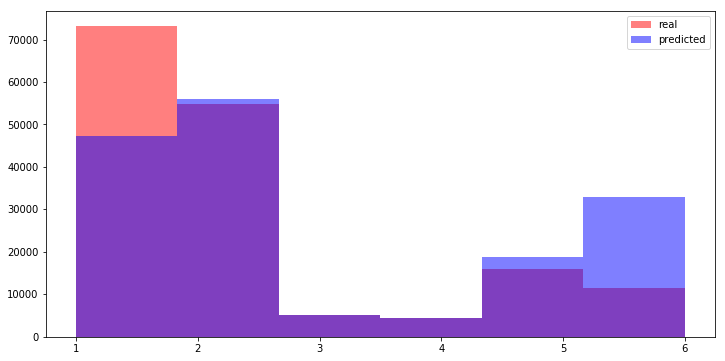

In [11]:
# create predictions using trained model
predicted = model.predict(X_test)

# convert from one-hot to integer
y_test_int = [np.argmax(y) + 1 for y in y_test]
y_pred_int = [np.argmax(y) + 1 for y in predicted]

# draw the histograms
plt.hist(y_test_int, bins=6, alpha=0.5, label='real', color='r')
plt.hist(y_pred_int, bins=6, alpha=0.5, label='predicted', color='b')
plt.legend(loc='upper right')
plt.show()

## Visualize the Weights

LAYER
shape: (3, 256)


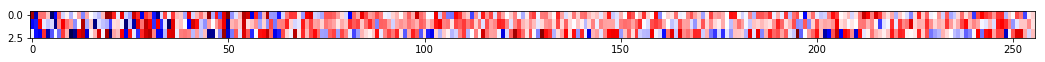

shape: (64, 256)


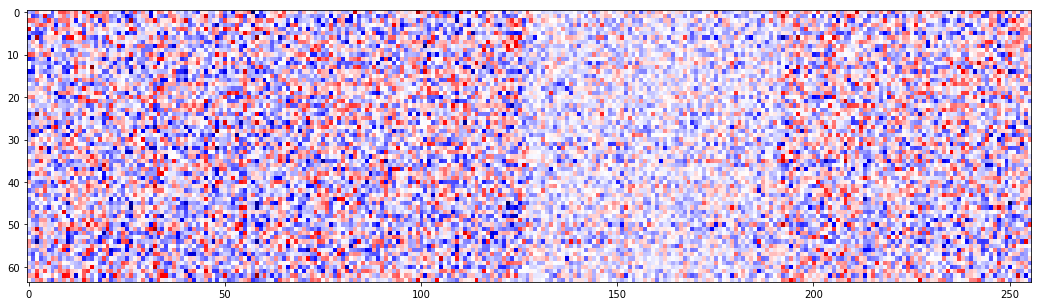

shape: (256,)


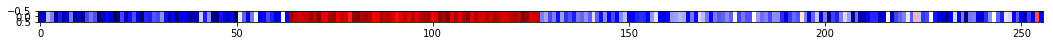

LAYER
shape: (64, 6)


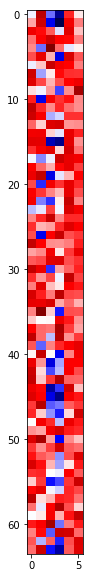

shape: (6,)


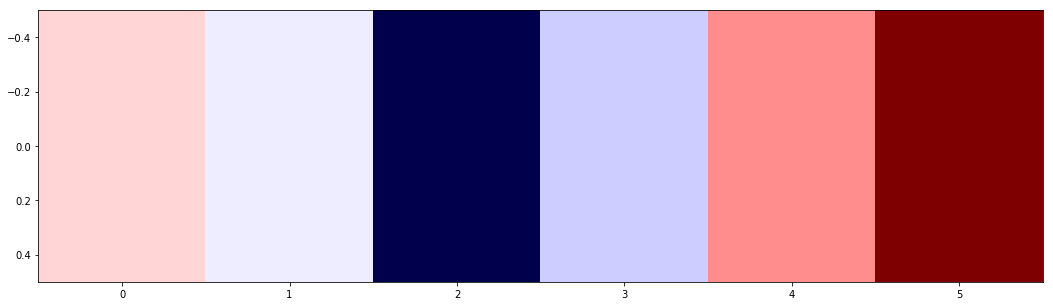

In [12]:
for layer in model.layers:
    if len(layer.get_weights()) > 0:
        print('LAYER')
        for i, weights in enumerate(layer.get_weights()):
            print('shape: {}'.format(weights.shape))
            if len(weights.shape) < 2:
                weights = np.expand_dims(weights, axis=0)
            if weights.shape[0] < weights.shape[1]:
                if i == 0:
                    size = (18, 0.5)
                if i == 1:
                    size = (18, 5)
                if i == 2:
                    size = (18, 0.2)
                fig, ax = plt.subplots(figsize=size)
            else:
                fig, ax = plt.subplots(figsize=(1, 10))
            ax.imshow(weights, cmap='seismic', aspect='auto', interpolation='nearest')
            plt.show()
